In [23]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

plt.style.use('fivethirtyeight')

In [24]:
stock_data = pd.read_csv('DATASET7k.csv', index_col='Date')
stock_data_ft = stock_data.drop(['Open','High','Low','Volume','OpenInt'], axis=1)
stock_data_ft.head()

,Close
Date,
7/21/2010,23.946
7/22/2010,24.487
7/23/2010,24.507
7/26/2010,24.595
7/27/2010,24.517


In [25]:
stock_data_ft.shape

(7279, 1)

In [26]:
data = stock_data_ft.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

5824

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
scaled_data

array([[0.24011911],
       [0.2473207 ],
       [0.24758693],
       ...,
       [0.19010733],
       [0.19399433],
       [0.19146512]])

In [28]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.24011911, 0.2473207 , 0.24758693, 0.24875836, 0.24772005,
       0.24657525, 0.24424572, 0.24527071, 0.25200639, 0.25470866,
       0.25506807, 0.25572034, 0.25316451, 0.25767715, 0.25794338,
       0.2461759 , 0.24451195, 0.2461759 , 0.24705447, 0.25369697,
       0.25560053, 0.25369697, 0.24785317, 0.24825252, 0.24347364,
       0.24231553, 0.24400611, 0.2473207 , 0.24772005, 0.24838563,
       0.2562528 , 0.25729111, 0.25986025, 0.25986025, 0.26076545,
       0.2635742 , 0.26409335, 0.27070923, 0.27161442, 0.27327837,
       0.27393064, 0.27289234, 0.28024035, 0.27948159, 0.27727186,
       0.27872283, 0.2817845 , 0.28477962, 0.28556501, 0.28684292,
       0.28543189, 0.28657669, 0.28335528, 0.29110264, 0.29006434,
       0.2877348 , 0.28941207, 0.29083641, 0.29252699, 0.29765196])]
[0.29512275316384085]

[array([0.24011911, 0.2473207 , 0.24758693, 0.24875836, 0.24772005,
       0.24657525, 0.24424572, 0.24527071, 0.25200639, 0.25470866,
       0.25506807, 0.25572034, 0.25

In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [31]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))
model.add(Dense(10))
model.add(Dense(1))

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
model.fit(x_train, y_train, batch_size=2, verbose=1, epochs=1)

2882/2882 [==============================] - 171s 51ms/step - loss: 0.0020


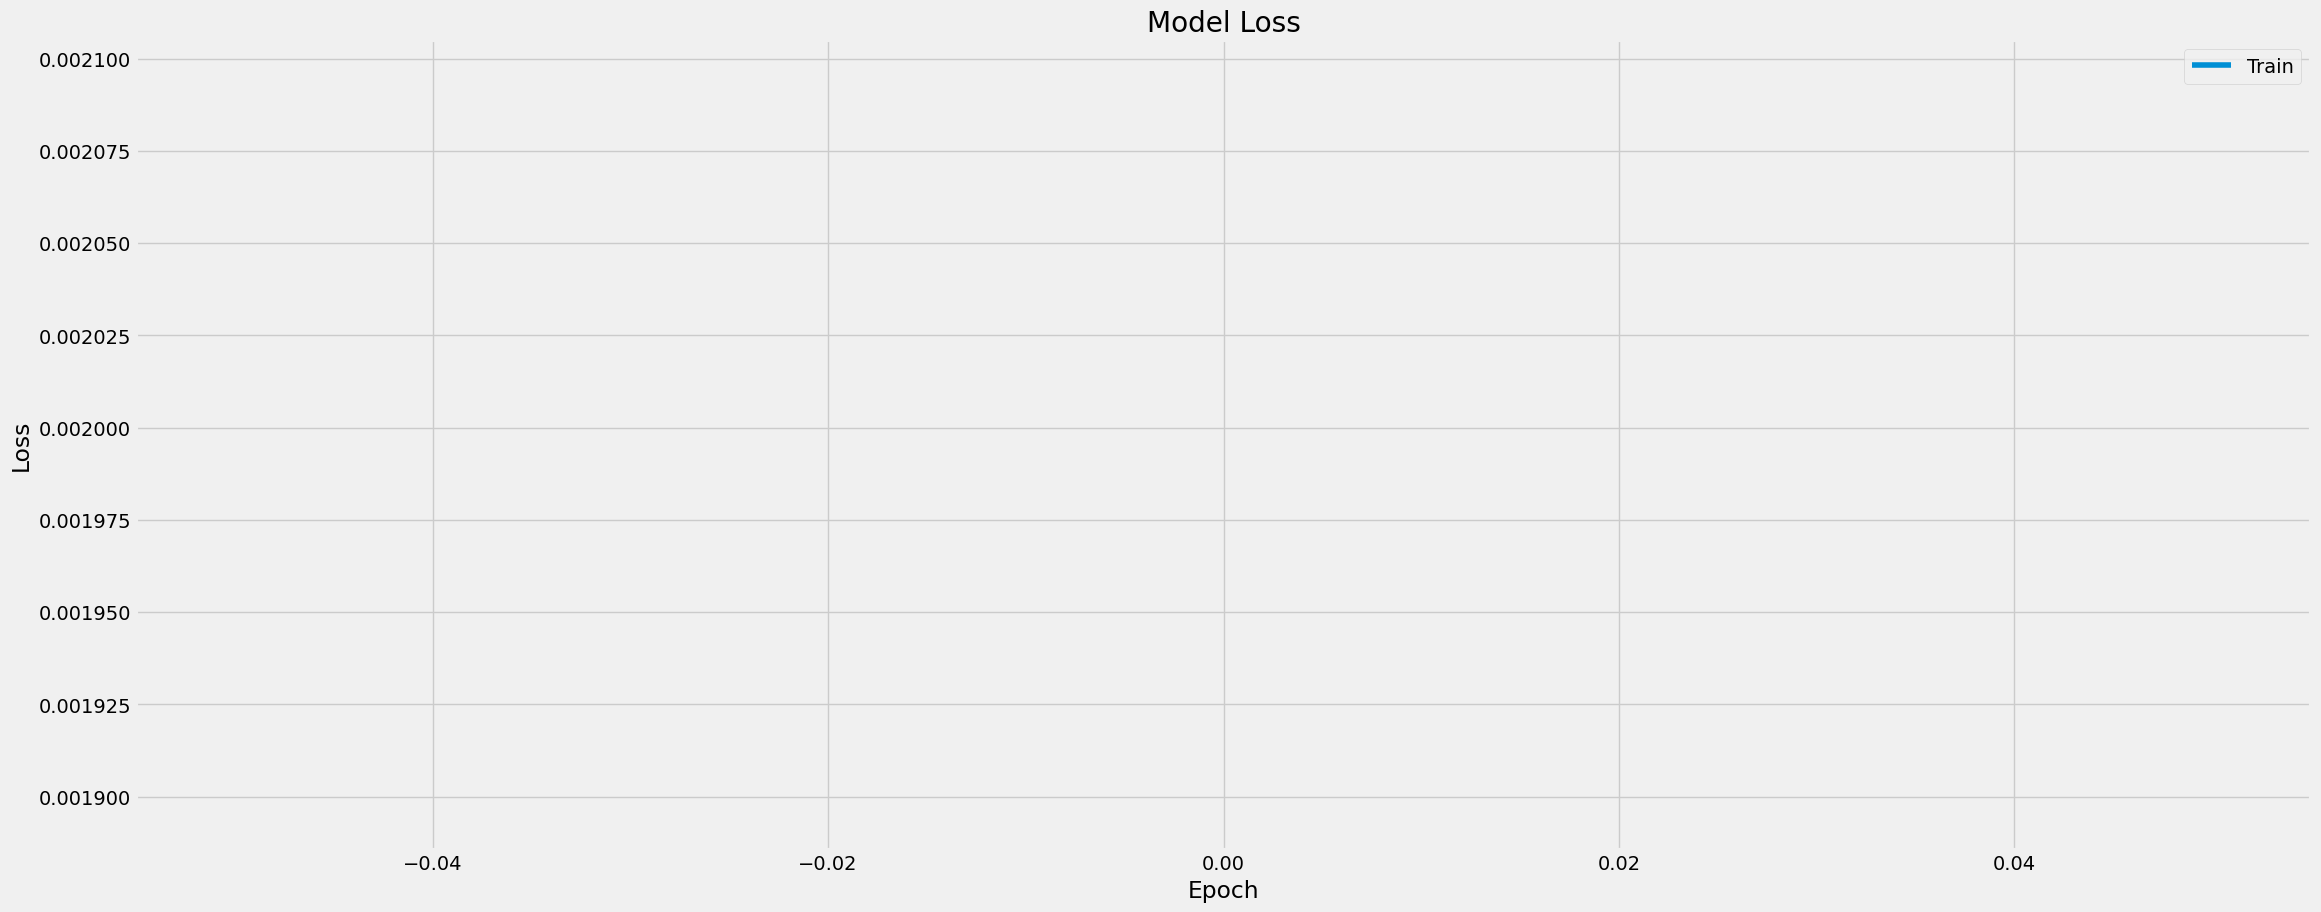

In [34]:
#plot loss function figure size 25, 10
plt.figure(figsize=(25,10))
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [35]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [36]:
x_test = np.array(x_test)

In [37]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

46/46 [==============================] - 11s 36ms/step


In [39]:
# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

0.6914054310315517

In [40]:
# MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

4.54546978871593

C:\Users\abira\AppData\Local\Temp\ipykernel_3552\3343147723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


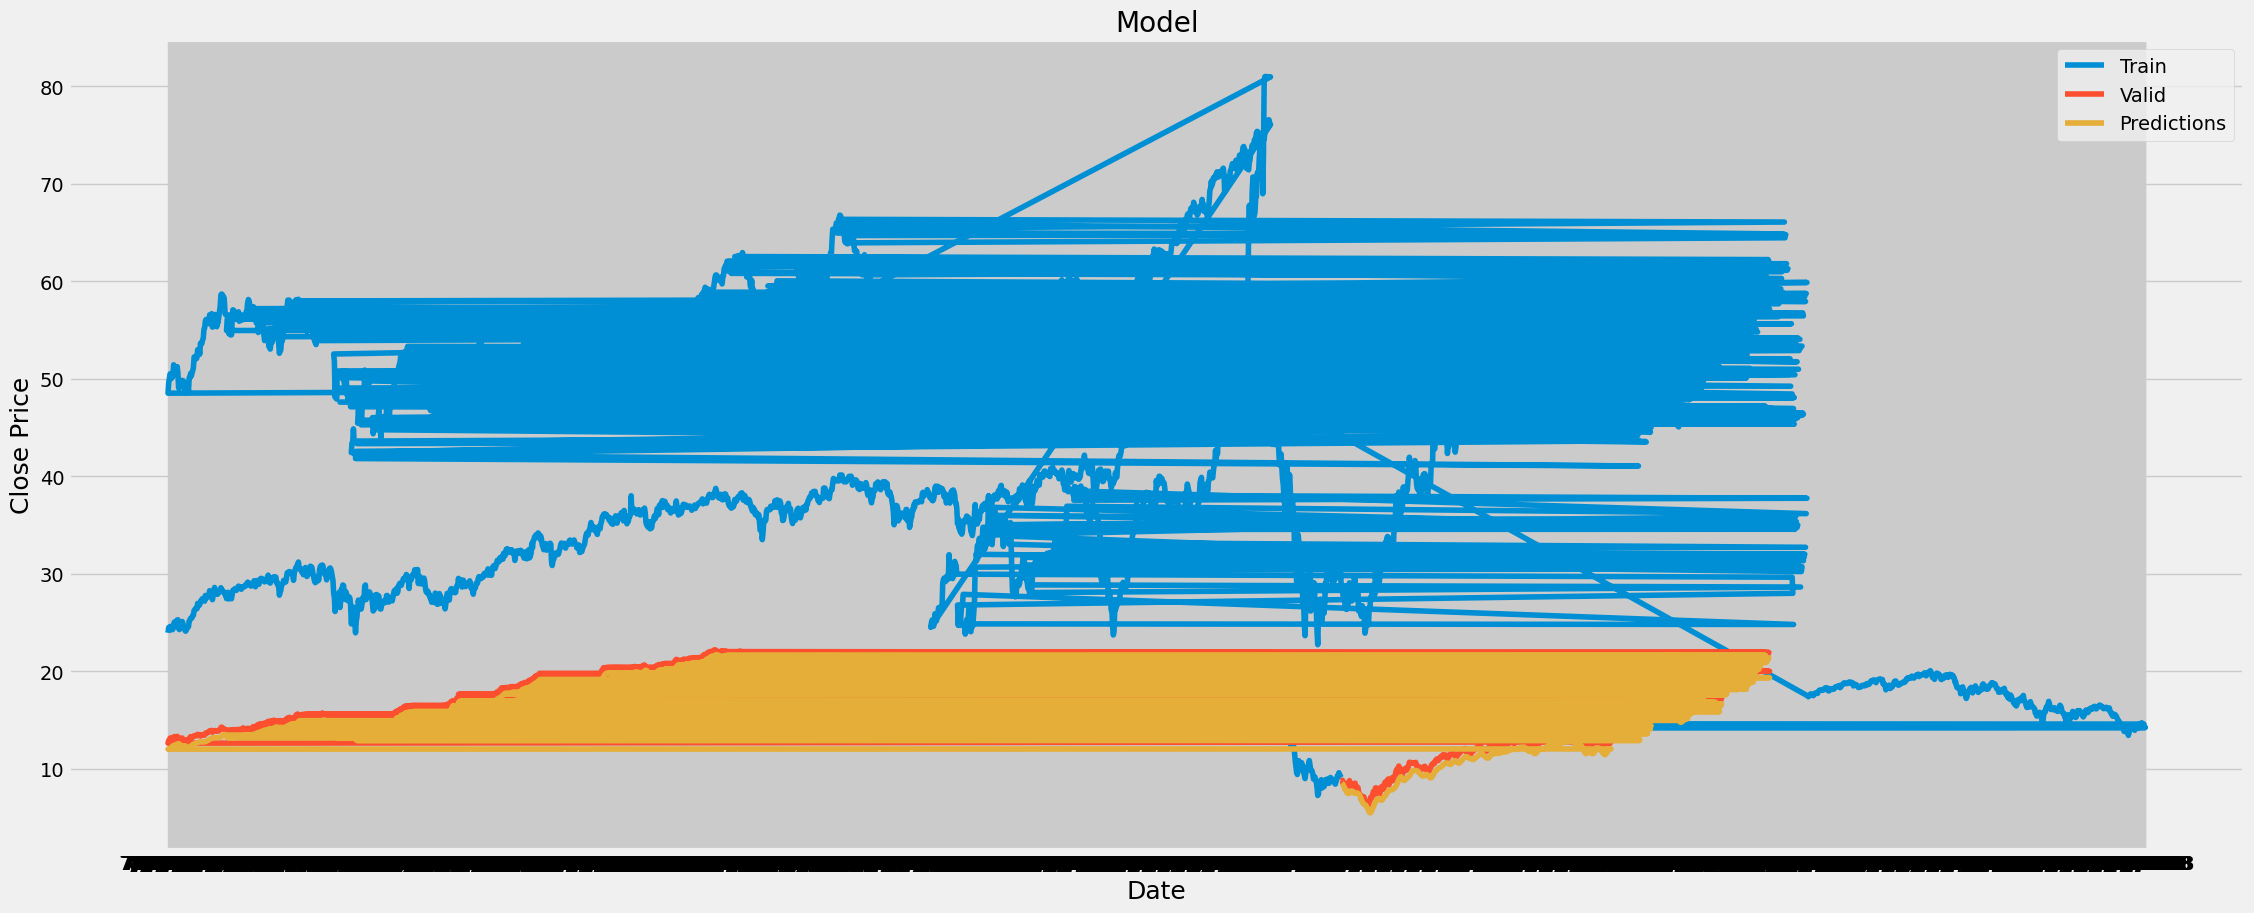

In [41]:
#plot the data with date at y axis
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions',]])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
plt.show()

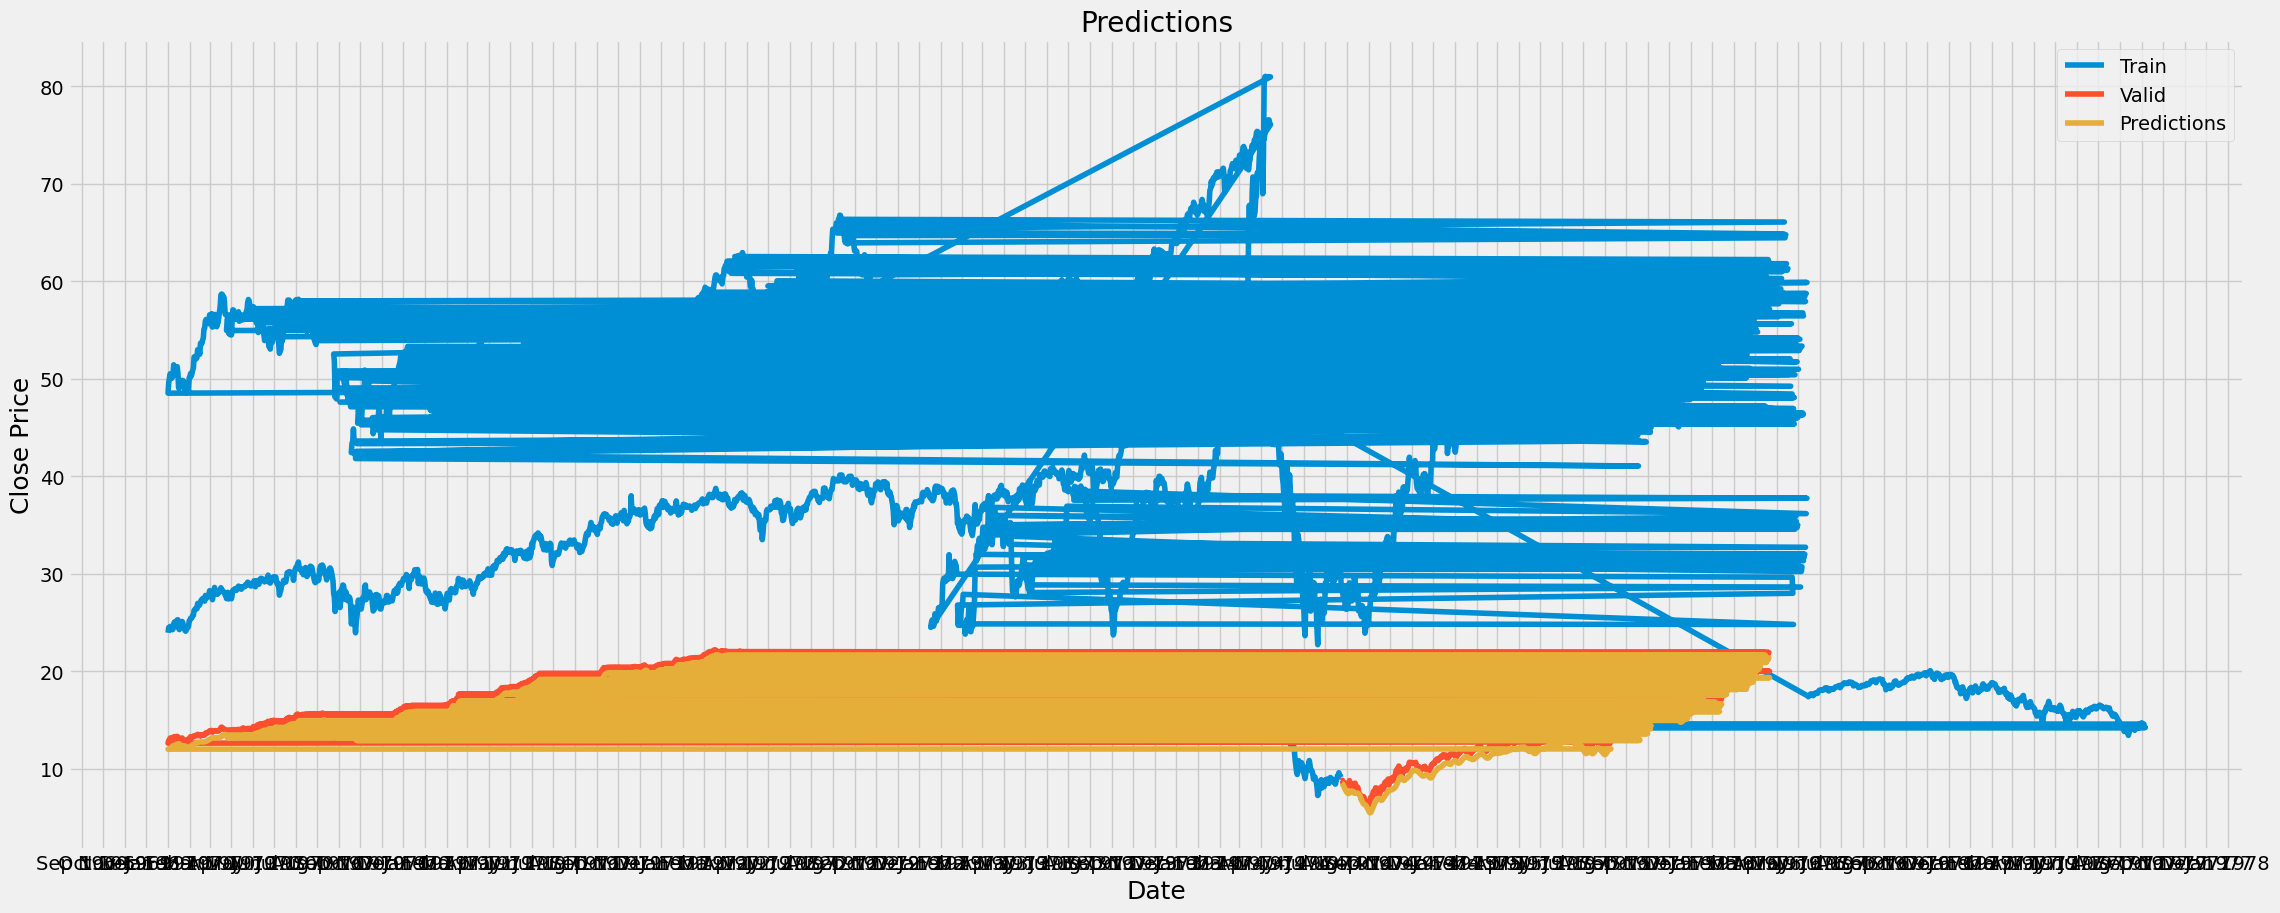

In [42]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Predictions')
ax.plot(train['Close'])
ax.plot(valid[['Close', 'Predictions',]])
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price', fontsize=18)
ax.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

In [43]:
valid

,Close,Predictions
Date,,
1/12/2009,8.7214,8.521152
1/13/2009,8.8192,8.457728
1/14/2009,8.4758,8.343307
1/15/2009,8.4476,8.187390
1/16/2009,8.5455,8.020018
...,...,...
10/16/2014,19.8880,19.430986
10/17/2014,19.9990,19.342878
10/20/2014,20.1890,19.338705


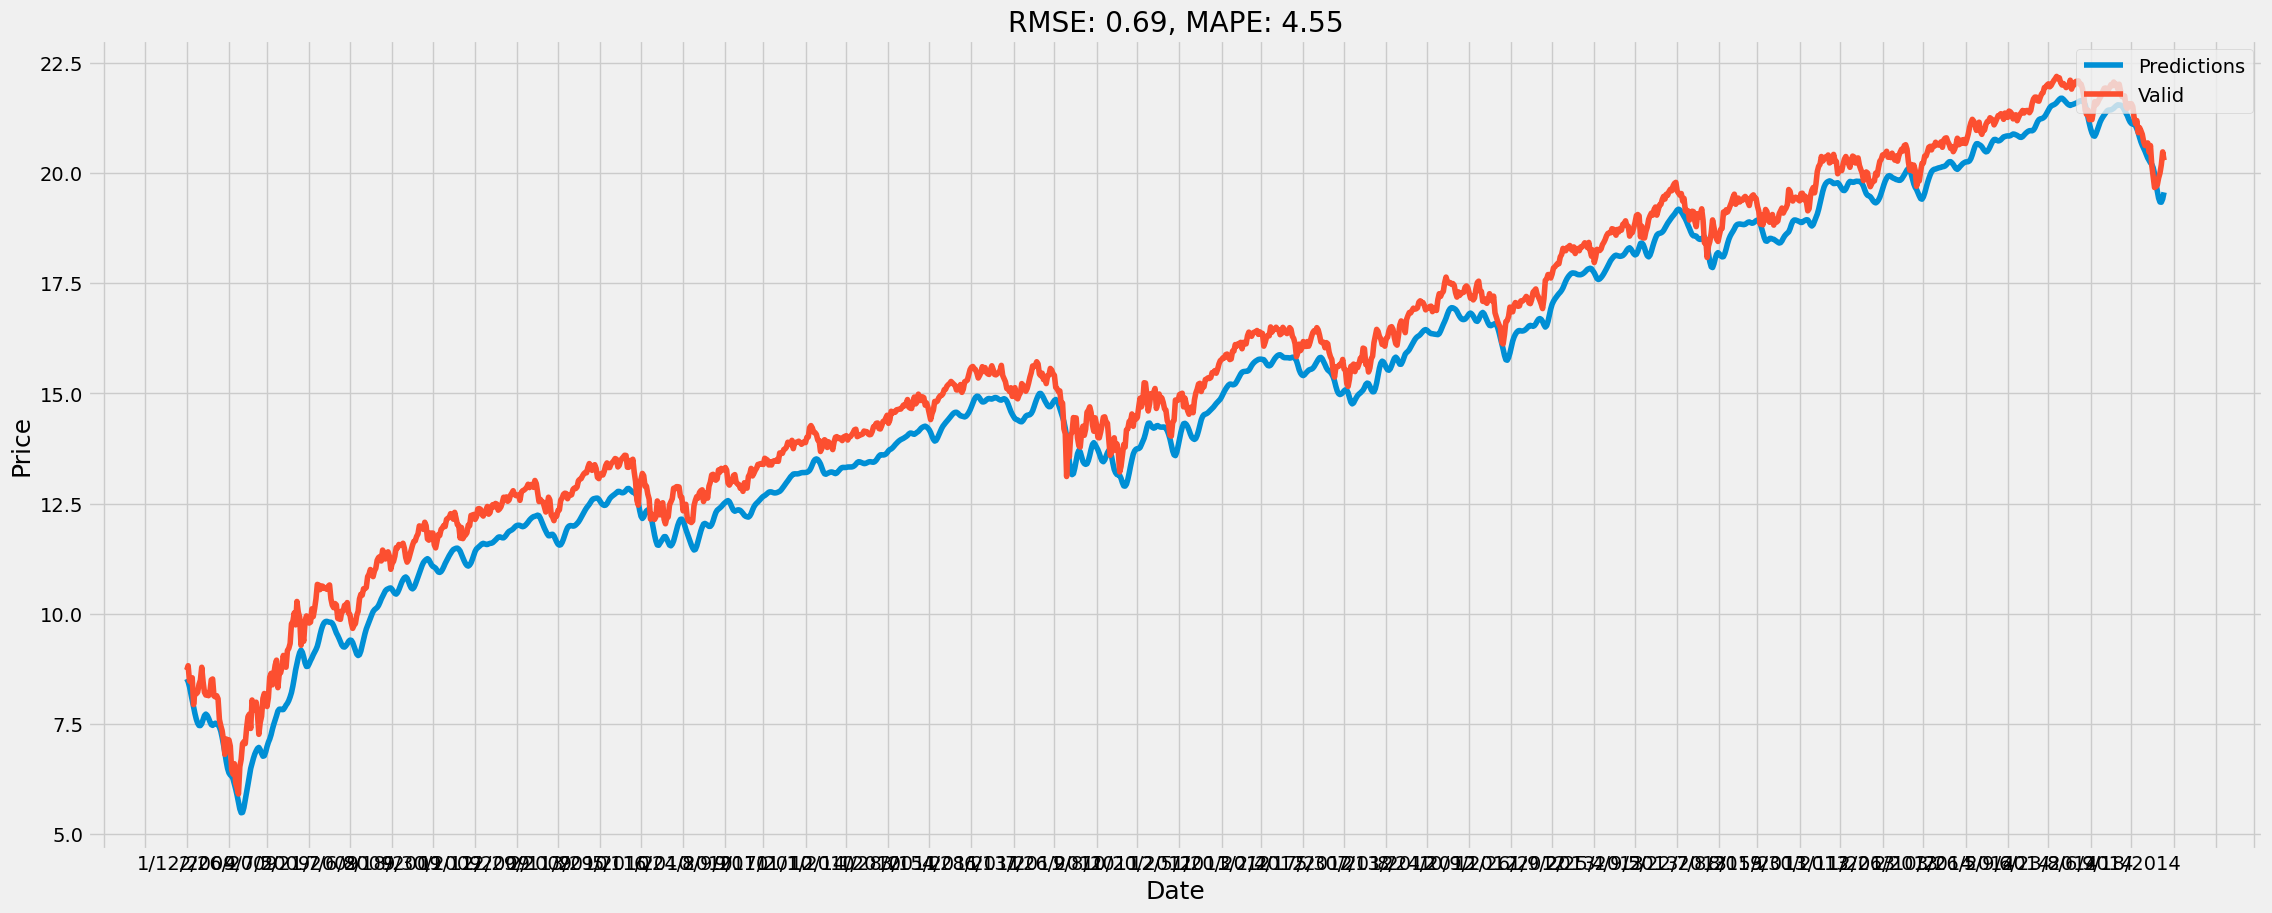

In [44]:
#plot rmse and mape and predicted value with only year and month
fig, ax = plt.subplots(figsize=(25, 10))
ax.title.set_text('RMSE: %.2f, MAPE: %.2f' % (rmse, mape))
ax.plot(valid['Predictions'])
ax.plot(valid['Close'])
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Price', fontsize=18)
ax.legend(['Predictions', 'Valid'], loc='upper right')
ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()